In [1]:
import numpy
import pandas
from sklearn import linear_model,model_selection,metrics
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
%matplotlib inline

In [2]:
#Import the data
data = pandas.read_csv('data.csv')
df = data.copy()
(df.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [3]:
#Relation of variables with price
(df.corr())
(df.isnull().sum())
(df[df==0].count())

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

c:\users\satvik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sqft_living for 0 price')

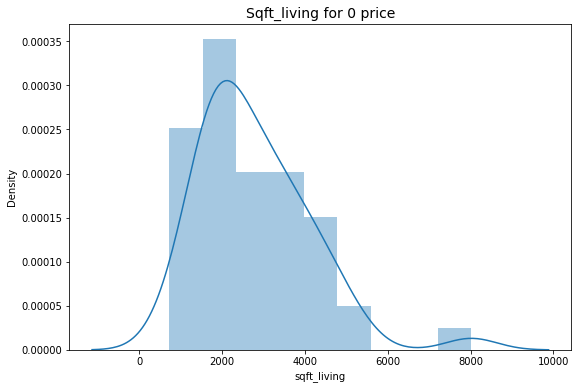

In [4]:
#Plot sqft_living for 0 price
plt.figure(figsize=(9,6))
ax = seaborn.distplot(df[df["price"]==0].sqft_living)
ax.set_title('Sqft_living for 0 price', fontsize=14)

In [5]:
#Features of 0 price houses
(df[df["price"]==0].describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.0,3.979592,2.698980,2787.142857,16453.306122,1.500000,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
std,0.0,1.108486,1.194584,1354.375625,27739.227932,0.520416,0.242226,1.485760,0.826331,1337.148708,612.726149,27.247964,988.903054
min,0.0,1.000000,1.000000,720.000000,3500.000000,1.000000,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
25%,0.0,3.000000,2.000000,1910.000000,6863.000000,1.000000,0.000000,0.000000,3.000000,1310.000000,0.000000,1952.000000,0.000000
50%,0.0,4.000000,2.500000,2600.000000,9000.000000,1.500000,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000
75%,0.0,5.000000,3.500000,3500.000000,13783.000000,2.000000,0.000000,0.000000,4.000000,3020.000000,900.000000,1998.000000,1999.000000
max,0.0,6.000000,6.250000,8020.000000,188200.000000,3.000000,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000


In [6]:
#Mean Price of houses with features similar to 0 price house
df_other = df[(df["bedrooms"]<4) & (df["bedrooms"]>2) & (df["bathrooms"]<3) & (df["bedrooms"]>2) & (df["sqft_living"]>2500) & (df["sqft_living"]<3000)]
df_other["price"].mean()

678649.6235193376

In [7]:
#Replacing 0 price with mean price of similar features houses
df["price"].replace(to_replace=0, value=678000, inplace=True)

Text(0.5, 1.0, 'Bedrooms VS Price')

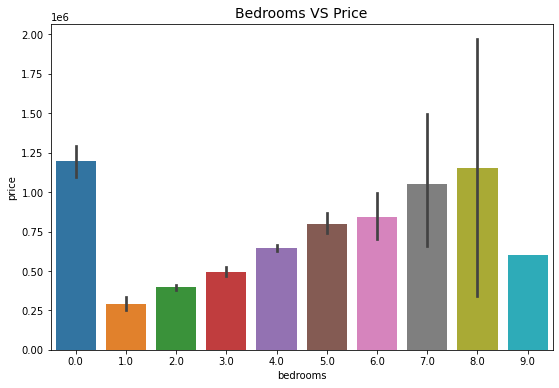

In [8]:
#Plot bedrooms vs price
plt.figure(figsize=(9,6))
ax = seaborn.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Sqft_living')

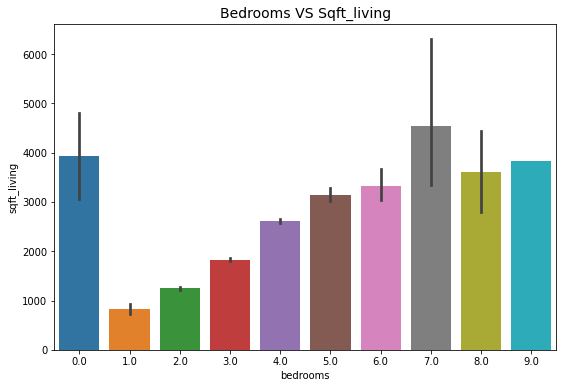

In [9]:
#Plot bedrooms vs sqft_living
plt.figure(figsize=(9,6))
ax = seaborn.barplot(x=df['bedrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Sqft_living', fontsize=14)

In [10]:
#Replacing 0 bedrooms with 8 as they have similar sqft_living
df["bedrooms"].replace(to_replace=0,value=8,inplace=True)

Text(0.5, 1.0, 'Bathrooms VS Price')

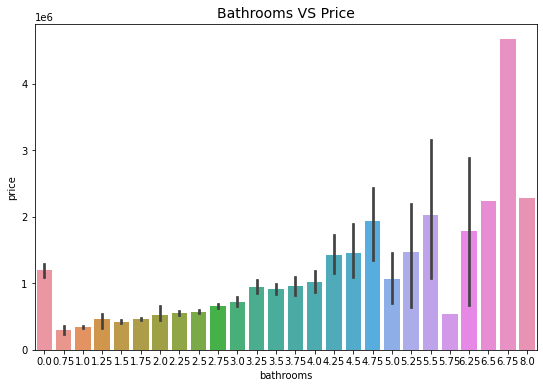

In [11]:
#Plot bathrooms vs price
plt.figure(figsize=(9,6))
ax = seaborn.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bathrooms VS Sqft_living')

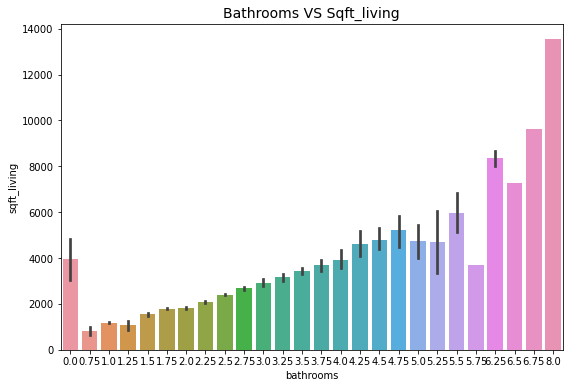

In [12]:
#Plot bathrooms vs sqft_living
plt.figure(figsize=(9,6))
ax = seaborn.barplot(x=df['bathrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Sqft_living', fontsize=14)

In [13]:
#Replacing 0 bathrooms with 4 as they have similar sqft_living
df["bathrooms"].replace(to_replace=0,value=4,inplace=True)

c:\users\satvik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

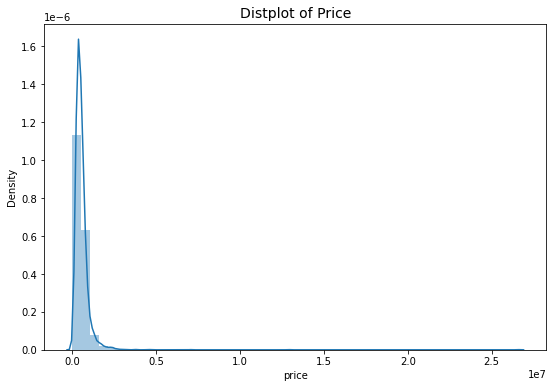

In [14]:
#Displot of Price
plt.figure(figsize=(9,6))
ax = seaborn.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

In [15]:
#Removing Outliers as Price distplot is negatively skewed
df['price'] = df['price'].replace([data['price'][numpy.abs(stats.zscore(data['price'])) > 3]],numpy.median(df['price']))

c:\users\satvik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

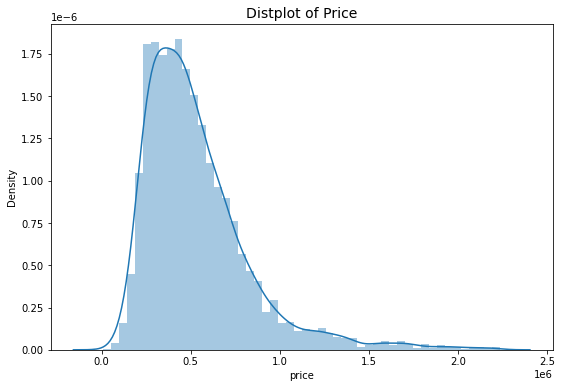

In [16]:
#Displot of Price
plt.figure(figsize=(9,6))
ax = seaborn.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_living VS Price')

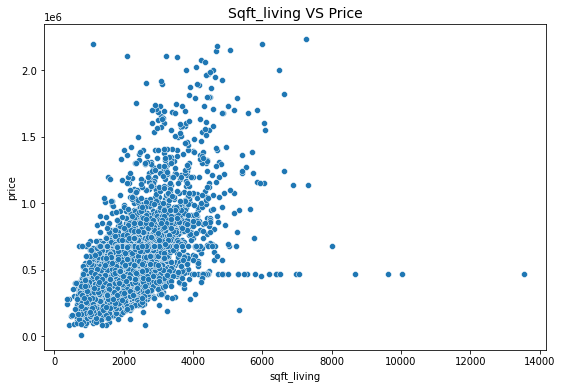

In [17]:
#Scatterplot of sqft_living
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

In [18]:
#Removing Outliers of sqft_living
df['sqft_living'] = numpy.where((df.sqft_living >6000 ), 6000, df.sqft_living)

Text(0.5, 1.0, 'Sqft_living VS Price')

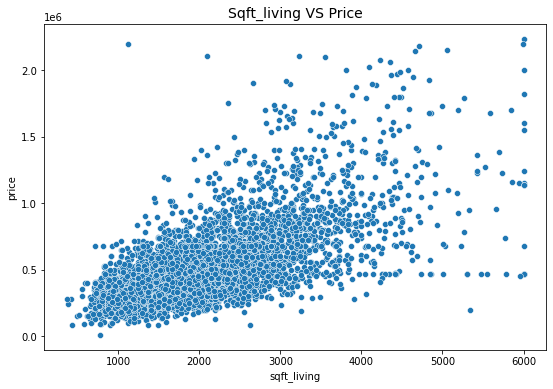

In [19]:
#Scatterplot of sqft_living
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_lot VS Price')

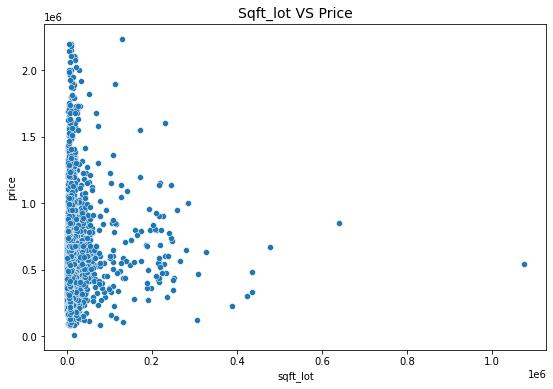

In [20]:
#Scatterplot of sqft_lot
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_lot", y="price")
ax.set_title('Sqft_lot VS Price', fontsize=14)

In [21]:
#Removing Outliers of sqft_lot
df['sqft_lot'] = numpy.where((df.sqft_lot >250000 ), 250000, df.sqft_lot)

Text(0.5, 1.0, 'Sqft_lot VS Price')

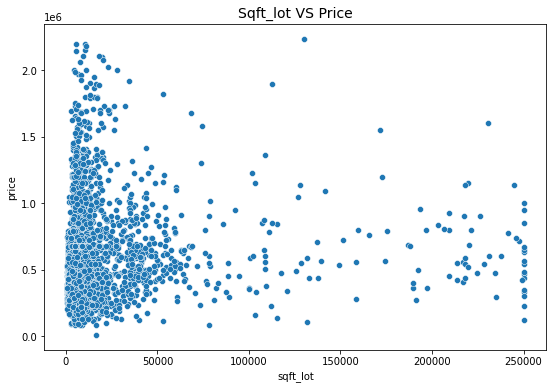

In [22]:
#Scatterplot of sqft_lot
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_lot", y="price")
ax.set_title('Sqft_lot VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_above VS Price')

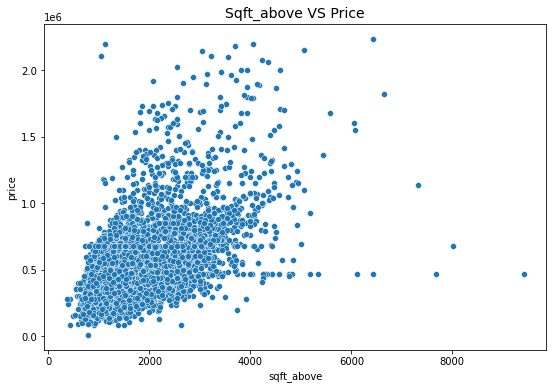

In [23]:
#Scatterplot of sqft_above
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_above", y="price")
ax.set_title('Sqft_above VS Price', fontsize=14)

In [24]:
#Removing Outliers of sqft_above
df['sqft_above'] = numpy.where((df.sqft_above >5000 ), 5000, df.sqft_above)

Text(0.5, 1.0, 'Sqft_above VS Price')

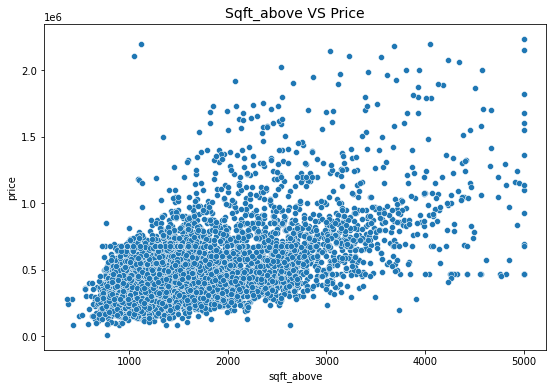

In [25]:
#Scatterplot of sqft_above
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_above", y="price")
ax.set_title('Sqft_above VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_basement VS Price')

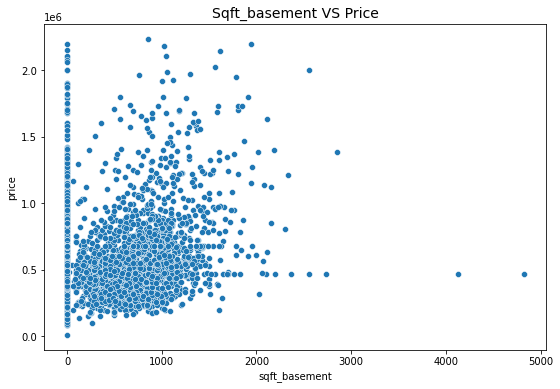

In [26]:
#Scatterplot of sqft_basement
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_basement", y="price")
ax.set_title('Sqft_basement VS Price', fontsize=14)

In [27]:
#Removing Outliers of sqft_basement
df['sqft_basement'] = numpy.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

Text(0.5, 1.0, 'Sqft_basement VS Price')

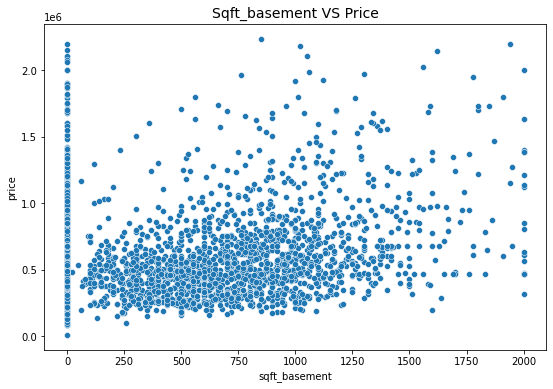

In [28]:
#Scatterplot of sqft_basement
plt.figure(figsize=(9,6))
ax = seaborn.scatterplot(data=df, x="sqft_basement", y="price")
ax.set_title('Sqft_basement VS Price', fontsize=14)

In [29]:
#Handling discrete values of bedrooms
df['bedrooms'].nunique()
bedrooms = df.groupby(['bedrooms']).price.agg([len, min, max])
bedrooms.to_markdown()

'|   bedrooms |   len |    min |              max |\n|-----------:|------:|-------:|-----------------:|\n|          1 |    38 |  80000 | 678000           |\n|          2 |   566 |   7800 |      1.695e+06   |\n|          3 |  2032 |  83300 |      2.1475e+06  |\n|          4 |  1531 |  84350 |      2.1999e+06  |\n|          5 |   353 | 185000 |      2.23889e+06 |\n|          6 |    61 | 175000 |      2.18e+06    |\n|          7 |    14 | 280000 |      1.95e+06    |\n|          8 |     4 | 340000 |      1.97e+06    |\n|          9 |     1 | 599999 | 599999           |'

In [30]:
#To prevent disturbance in data 
df['bedrooms'] = numpy.where(df.bedrooms > 6, 6 ,df.bedrooms)

In [31]:
#Handling discrete values of bathrooms
df['bathrooms'].nunique()
bathrooms = df.groupby(['bathrooms']).price.agg([len, min, max])
bathrooms.to_markdown()

'|   bathrooms |   len |              min |              max |\n|------------:|------:|-----------------:|-----------------:|\n|        0.75 |    17 |  80000           | 562100           |\n|        1    |   743 |   7800           |      2.11e+06    |\n|        1.25 |     3 | 321950           | 545000           |\n|        1.5  |   291 | 107500           |      2.1999e+06  |\n|        1.75 |   629 | 120750           |      2.1e+06     |\n|        2    |   427 |  83300           |      1.755e+06   |\n|        2.25 |   419 | 132250           |      2.11e+06    |\n|        2.5  |  1189 | 168000           |      1.92e+06    |\n|        2.75 |   276 | 188000           |      2.18e+06    |\n|        3    |   167 | 235000           |      1.99e+06    |\n|        3.25 |   136 | 300000           |      1.9e+06     |\n|        3.5  |   162 | 248000           |      2.1475e+06  |\n|        3.75 |    37 | 195000           |      2.065e+06   |\n|        4    |    25 | 315000           |      2e+06 

In [32]:
#To prevent disturbance in data 
df['bathrooms'] = numpy.where(df.bathrooms == 0.75, 1 ,df.bathrooms)
df['bathrooms'] = numpy.where(df.bathrooms == 1.25, 1 ,df.bathrooms)
df['bathrooms'] = numpy.where(df.bathrooms > 4.5, 4.5 ,df.bathrooms)

In [33]:
#Handling discrete values of floors
df['floors'].nunique()
floors = df.groupby(['floors']).price.agg([len, min, max])
floors.to_markdown()

'|   floors |   len |    min |         max |\n|---------:|------:|-------:|------------:|\n|      1   |  2174 |   7800 | 2.1999e+06  |\n|      1.5 |   444 | 132500 | 2.027e+06   |\n|      2   |  1811 |  84350 | 2.23889e+06 |\n|      2.5 |    41 | 195000 | 1.99e+06    |\n|      3   |   128 | 288790 | 2e+06       |\n|      3.5 |     2 | 563500 | 1.095e+06   |'

In [34]:
#To prevent disturbance in data 
df['floors'] = numpy.where(df.floors ==3.5, 3 ,df.floors)

In [35]:
#Handling discrete values of waterfront
df['waterfront'].nunique()
waterfront = df.groupby(['waterfront']).price.agg([len, min, max])
waterfront.to_markdown()

'|   waterfront |   len |    min |         max |\n|-------------:|------:|-------:|------------:|\n|            0 |  4567 |   7800 | 2.23889e+06 |\n|            1 |    33 | 385000 | 2.2e+06     |'

In [36]:
#To prevent disturbance in data
#No disturbance

In [37]:
#Handling discrete values of condition
df['condition'].nunique()
condition = df.groupby(['condition']).price.agg([len, min, max])
condition.to_markdown()

'|   condition |   len |   min |              max |\n|------------:|------:|------:|-----------------:|\n|           1 |     6 |  7800 | 550000           |\n|           2 |    32 | 80000 | 678000           |\n|           3 |  2875 | 83000 |      2.23889e+06 |\n|           4 |  1252 | 83300 |      2.11e+06    |\n|           5 |   435 | 83300 |      2.1475e+06  |'

In [38]:
#To prevent disturbance in data 
df['condition'] = numpy.where(df.condition ==1, 2 ,df.condition)

Text(0.5, 1.0, 'CORRELATION MATRIX')

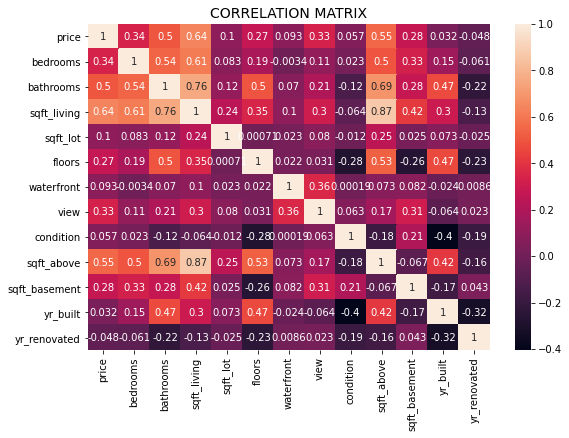

In [39]:
#Plot of Heatmap
plt.figure(figsize=(9,6))
ax = seaborn.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [40]:
#Make dummies of statezip to use it as a variable
df = pandas.get_dummies(df, columns=['statezip'], prefix = ['statezip'])

In [41]:
#Create Model
X = df.drop(columns=["price","date","street","city","country"])
y = df[["price"]]

In [42]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=50)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)
print("explained_variance_score : ",metrics.explained_variance_score(y_test,y_pred))
print("max_error : ",metrics.max_error(y_test,y_pred))
print("mean_absolute_error : ",metrics.mean_absolute_error(y_test,y_pred))
print("mean_squared_error : ",metrics.mean_squared_error(y_test,y_pred))
print("mean_squared_log_error : ",metrics.mean_squared_log_error(y_test,y_pred))
print("mean_absolute_percentage_error : ",metrics.mean_absolute_percentage_error(y_test,y_pred))
print("median_absolute_error : ",metrics.median_absolute_error(y_test,y_pred))
print("r2_score : ",metrics.r2_score(y_test,y_pred))

explained_variance_score :  0.7263689983438038
max_error :  1265577.6392805874
mean_absolute_error :  93320.21416728517
mean_squared_error :  25954205385.90649
mean_squared_log_error :  0.06420609977688856
mean_absolute_percentage_error :  0.19477983081040492
median_absolute_error :  55069.36503234797
r2_score :  0.726338460452626
